## Work on Deepwalk Algorithm using Karate club

34


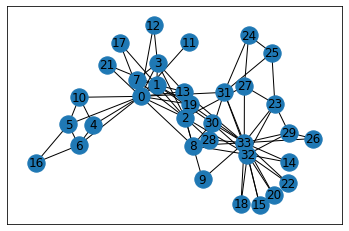

In [1]:
import networkx as nx

G = nx.karate_club_graph()
print(len(G.nodes))
nx.draw_networkx(G)

## plot the graph with Labels

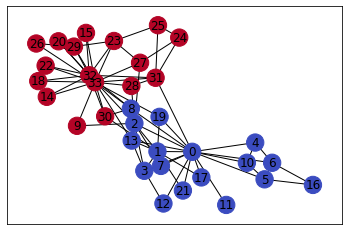

In [2]:
labels= []

for i in G.nodes:
    club_names = G.nodes[i]['club']
    labels.append(1 if club_names == 'Officer' else 0)

layout_pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout_pos, node_color = labels, cmap = 'coolwarm')

## Perform node embedding using Deepwalk

In [3]:
from karateclub import DeepWalk
DeepWalk_model = DeepWalk(walk_number=10, walk_length=80, dimensions=124)
DeepWalk_model.fit(G)
embeding = DeepWalk_model.get_embedding()
print('Embeding array shape', embeding.shape)

Embeding array shape (34, 124)


## Low dimensional plot of the nodes x features


In [4]:
from sklearn.decomposition import PCA
PCA_model = PCA(n_components=2)
lowdimension_embedding = PCA_model.fit_transform(embeding)
lowdimension_embedding.shape

(34, 2)

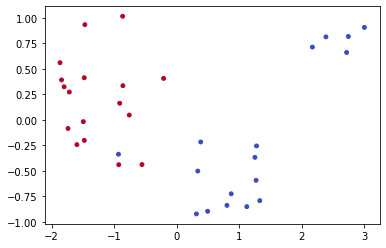

In [5]:
import matplotlib.pyplot as plt
plt.scatter(lowdimension_embedding[:,0],lowdimension_embedding[:,1], c= labels, s=15,cmap='coolwarm')

## node classification using embedded model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(embeding, labels, test_size= 0.3)
ML_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_preds = ML_model.predict(X_test)
ML_acc = roc_auc_score(y_test, y_preds)
print('AUC:', ML_acc)

AUC: 0.9
